In [4]:
%matplotlib inline

import math
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Setup the variables
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]

min_ = []
max_ = []
median = []
top_q = []
bottom_q = []
realized = []

# Get some data
data = yf.download("JPM", start="2020-01-01", end="2020-12-31")


[*********************100%***********************]  1 of 1 completed


Realized volatility

Realized volatility is a measurement of how much the price or returns of stock vary. It’s used to optimize portfolios, detect regime changes, and price derivatives. The most common way to measure realized volatility is the standard deviation.

In [6]:
def realized_vol(price_data, window=30):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    return log_return.rolling(window=window, center=False).std() * math.sqrt(252)

In [7]:
for window in windows:

    # get a dataframe with realized volatility
    estimator = realized_vol(window=window, price_data=data)

    # append the summary stats to a list
    min_.append(estimator.min())
    max_.append(estimator.max())
    median.append(estimator.median())
    top_q.append(estimator.quantile(quantiles[1]))
    bottom_q.append(estimator.quantile(quantiles[0]))
    realized.append(estimator[-1])

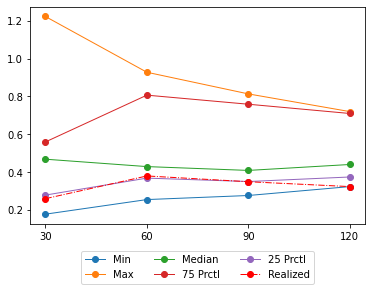

In [8]:
# create the plots on the chart
plt.plot(windows, min_, "-o", linewidth=1, label="Min")
plt.plot(windows, max_, "-o", linewidth=1, label="Max")
plt.plot(windows, median, "-o", linewidth=1, label="Median")
plt.plot(windows, top_q, "-o", linewidth=1, label=f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows, bottom_q, "-o", linewidth=1, label=f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")

# set the x-axis labels
plt.xticks(windows)

# format the legend
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)